#### Data preprocessing

In [2]:
import pandas as pd

weatherdf = pd.read_csv("weather_data.csv")

#Display first 5 rows
weatherdf.head()

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331


In [3]:
#checking missing values
print(weatherdf.isnull().sum()) 

date                0
avg_temperature    15
humidity           15
avg_wind_speed     15
rain_or_not         0
cloud_cover        15
pressure            0
dtype: int64


In [6]:
#check data types
weatherdf.dtypes

date                object
avg_temperature    float64
humidity           float64
avg_wind_speed     float64
rain_or_not         object
cloud_cover        float64
pressure           float64
dtype: object

In [14]:
#Filling missing values 
cleaneddf = weatherdf.copy()

cleaneddf["avg_temperature"] = cleaneddf["avg_temperature"].fillna(cleaneddf["avg_temperature"].median())
cleaneddf["humidity"] = cleaneddf["humidity"].fillna(cleaneddf["humidity"].median())
cleaneddf["avg_wind_speed"] = cleaneddf["avg_wind_speed"].fillna(cleaneddf["avg_wind_speed"].median())
cleaneddf["cloud_cover"] = cleaneddf["cloud_cover"].fillna(cleaneddf["cloud_cover"].median())


In [15]:
#Checking again for missing values
print(cleaneddf.isnull().sum())

date               0
avg_temperature    0
humidity           0
avg_wind_speed     0
rain_or_not        0
cloud_cover        0
pressure           0
dtype: int64


In [17]:
print(cleaneddf["date"].dtype)

object


In [18]:
# Convert date to datetime format
cleaneddf["date"] = pd.to_datetime(cleaneddf["date"], errors="coerce")

# Extract features
cleaneddf["day"] = cleaneddf["date"].dt.day
cleaneddf["month"] = cleaneddf["date"].dt.month

#creating a new season feature to learn how seasons affect rainfall
cleaneddf["season"] = cleaneddf["month"].apply(lambda x: "Winter" if x in [12, 1, 2] 
                                 else "Spring" if x in [3, 4, 5]
                                 else "Summer" if x in [6, 7, 8]
                                 else "Autumn")

# Drop original date column
cleaneddf.drop(columns=["date"], inplace=True)

In [19]:
print(cleaneddf.columns)

Index(['avg_temperature', 'humidity', 'avg_wind_speed', 'rain_or_not',
       'cloud_cover', 'pressure', 'day', 'month', 'season'],
      dtype='object')


In [22]:
#Encoding seasons variable
cleaneddf = pd.get_dummies(cleaneddf, columns=["season"], drop_first=True)
cleaneddf

,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure,day,month,season_Spring,season_Summer,season_Winter
0,23.745401,46.140905,7.845981,Rain,20.851051,992.965681,1,1,False,False,True
1,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025,2,1,False,False,True
2,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357,3,1,False,False,True
3,27.550929,53.103799,5.886677,Rain,81.744971,968.610142,4,1,False,False,True
4,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331,5,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
306,22.072834,37.756910,4.729355,No Rain,27.307081,954.564875,3,11,False,False,False
307,19.645885,42.190604,8.092369,No Rain,51.807877,964.002410,4,11,False,False,False
308,23.884496,36.205508,11.860847,Rain,29.872557,977.681431,5,11,False,False,False
309,18.168418,34.785000,4.781288,No Rain,94.067925,1047.153269,6,11,False,False,False


In [24]:
#Feature scaling-standardizing values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ["avg_temperature", "humidity", "avg_wind_speed", "cloud_cover", "pressure"]
cleaneddf[numerical_features] = scaler.fit_transform(cleaneddf[numerical_features])


In [31]:
#Checking the rain data type and convert it into a numerical variable for analysis
print(cleaneddf["rain_or_not"].unique())

['Rain' 'No Rain']


In [32]:
cleaneddf2 = cleaneddf.copy()

cleaneddf2["rain_or_not"] = cleaneddf["rain_or_not"].map({"No Rain": 0, "Rain": 1})

In [38]:
print(cleaneddf2["rain_or_not"].unique())

[1 0]


#### Exploratory data analysis(EDA)

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

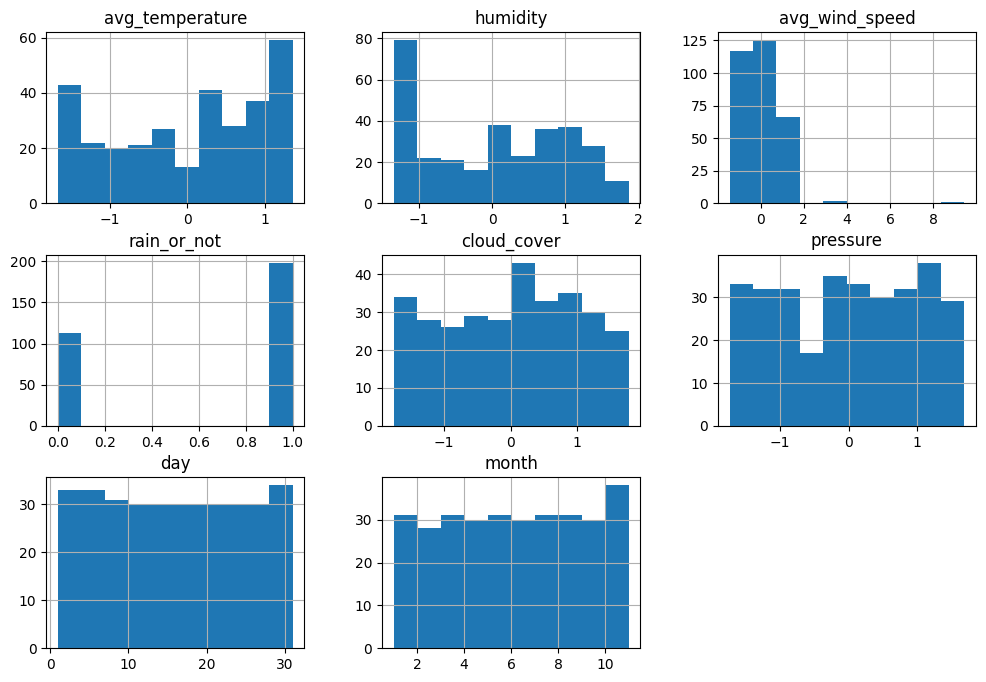

In [34]:
#Checking the feature distribution of data
cleaneddf2.hist(figsize=(12, 8))
plt.show()

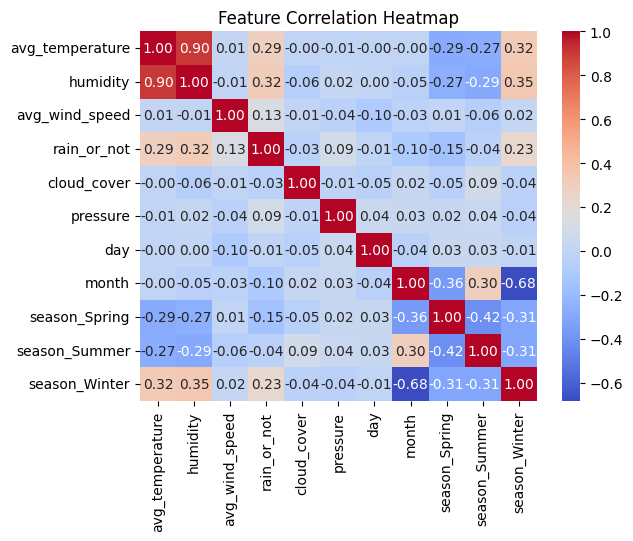

In [40]:
#checking how strongly each feature is related to rain_or_not
corr = cleaneddf2.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

##### avg_temperature (0.29) → Strong positive correlation
##### humidity (+0.32) → Strong Positive correlation
##### cloud_cover (-0.03) → Weak negative correlation(almost no correlation)
##### pressure (-0.09) → Weak negative correlation

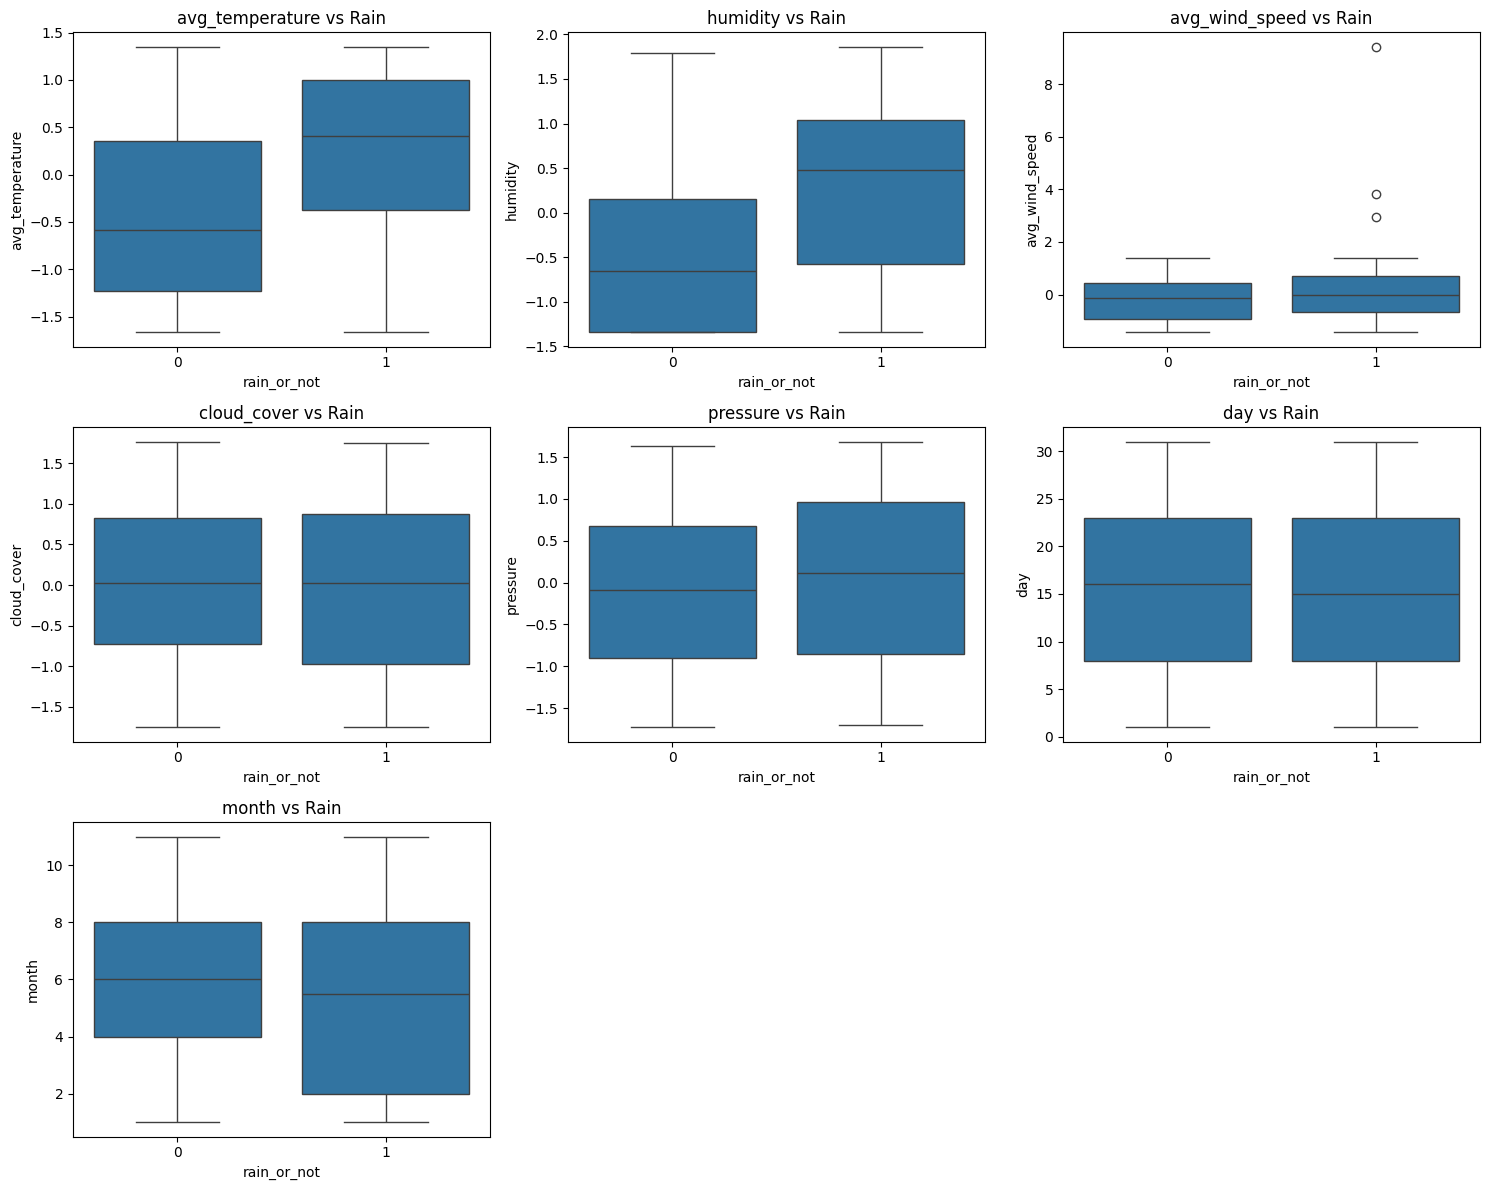

In [43]:
#Boxplots
features = ["avg_temperature", "humidity", "avg_wind_speed", "cloud_cover", "pressure", "day", "month"]

# Set plot size
plt.figure(figsize=(15, 12))

# Loop through features and create boxplots
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)  # Create subplot grid
    sns.boxplot(x="rain_or_not", y=cleaneddf2[feature], data=cleaneddf2)
    plt.title(f"{feature} vs Rain")
    
plt.tight_layout()  
plt.show()

##### Feature importance analysis

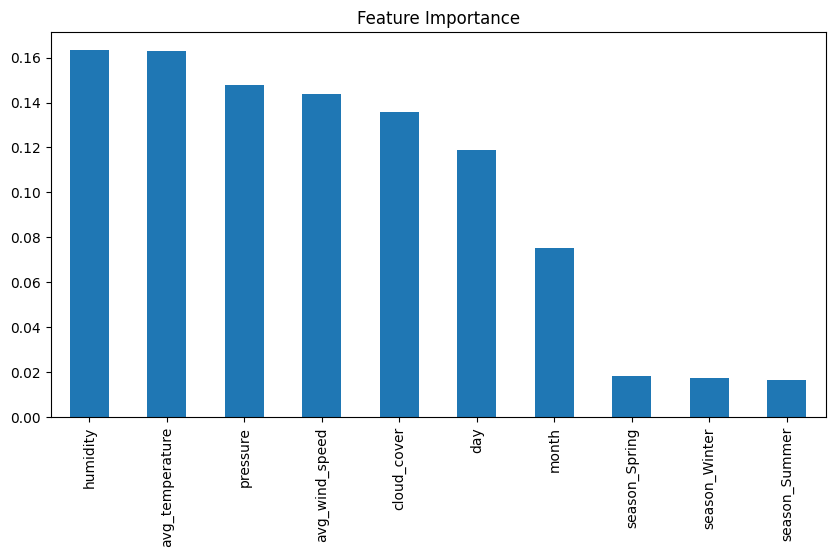

In [45]:

from sklearn.ensemble import RandomForestClassifier

X = cleaneddf2.drop(columns=["rain_or_not"])  # Features
y = cleaneddf2["rain_or_not"]  # Target variable

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Plot feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance.plot(kind="bar", figsize=(10, 5), title="Feature Importance")
plt.show()

#### Training and evaluating ML models

In [46]:
#Split data for training
from sklearn.model_selection import train_test_split

# Define features and target variable
X = cleaneddf2.drop(columns=["rain_or_not"])
y = cleaneddf2["rain_or_not"]

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

##### Training models

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report



In [50]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.6667
              precision    recall  f1-score   support

           0       0.56      0.39      0.46        23
           1       0.70      0.82      0.76        40

    accuracy                           0.67        63
   macro avg       0.63      0.61      0.61        63
weighted avg       0.65      0.67      0.65        63

Decision Tree Accuracy: 0.5873
              precision    recall  f1-score   support

           0       0.43      0.39      0.41        23
           1       0.67      0.70      0.68        40

    accuracy                           0.59        63
   macro avg       0.55      0.55      0.55        63
weighted avg       0.58      0.59      0.58        63

Random Forest Accuracy: 0.6508
              precision    recall  f1-score   support

           0       0.53      0.39      0.45        23
           1       0.70      0.80      0.74        40

    accuracy                           0.65        63
   macro avg       0.61      

#### Hyperparameter tuning for Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define hyperparameter grid for Logistic Regression
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],  
    "solver": ["liblinear", "saga", "newton-cg"],  
    "max_iter": [500, 1000, 10000]  }

# Initialize GridSearchCV with LogisticRegression
grid_search = GridSearchCV(LogisticRegression(solver='saga', max_iter=10000, class_weight='balanced'), param_grid, cv=5, scoring="accuracy")

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Train best model
best_model = grid_search.best_estimator_

Best Parameters: {'C': 100, 'max_iter': 500, 'solver': 'liblinear'}


#### Predict Probability of Rain -Logistic regression

In [75]:
# Get probabilities of rain
rain_probabilities1 = best_model.predict_proba(X_test)[:, 1]

# Convert to DataFrame
rain_predictions1 = pd.DataFrame({
    "Actual": y_test,
    "Predicted_Probability": rain_probabilities1
})

print(rain_predictions1.head())

     Actual  Predicted_Probability
26        0               0.970701
283       0               0.992096
154       0               0.954107
30        1               0.978262
29        1               0.966887


C:\Users\PCC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [81]:
# Convert probabilities to class predictions (threshold 0.5)
predicted_classes1 = (rain_probabilities1 >= 0.5).astype(int)

# Add to the DataFrame
rain_predictions1["Predicted_Class1"] = predicted_classes1

In [82]:
# Calculate accuracy by comparing predicted classes with actual values
accuracy = (rain_predictions1["Actual"] == rain_predictions1["Predicted_Class1"]).mean()
accuracy

np.float64(0.6349206349206349)

#### Hyperparameter tuning for Random forest classifer

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 10],
    "min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train best model
best_model2 = grid_search.best_estimator_

Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}


#### Predict probability of rain-Random forest

In [76]:
# Get probabilities of rain
rain_probabilities2 = best_model2.predict_proba(X_test)[:, 1]

# Convert to DataFrame
rain_predictions2 = pd.DataFrame({
    "Actual": y_test,
    "Predicted_Probability": rain_probabilities2
})

print(rain_predictions2)

     Actual  Predicted_Probability
26        0               0.940458
283       0               0.813632
154       0               0.474620
30        1               0.917354
29        1               0.889701
..      ...                    ...
180       1               0.591952
288       0               0.769413
40        1               0.937281
86        1               0.398231
156       1               0.767673

[63 rows x 2 columns]


In [79]:
# Convert probabilities to class predictions (threshold 0.5)
predicted_classes2 = (rain_probabilities2 >= 0.6).astype(int)

# Add to the DataFrame
rain_predictions2["Predicted_Class"] = predicted_classes2

In [80]:
# Calculate accuracy by comparing predicted classes with actual values
accuracy = (rain_predictions2["Actual"] == rain_predictions2["Predicted_Class"]).mean()
accuracy

np.float64(0.6031746031746031)